In [1]:
!pip3 install pandas matplotlib pillow

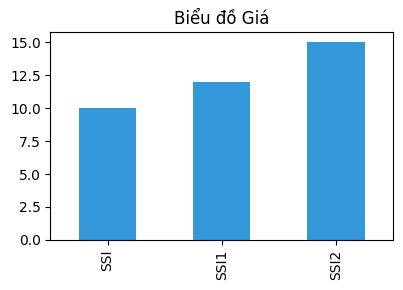

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import io

# 1. Tạo dữ liệu
data = {'Giá':[10,12,15], 'KH':[100,150,120]}
df = pd.DataFrame(data, index=['SSI','SSI1','SSI2'])

# 2. Vẽ chart với matplotlib
fig, ax = plt.subplots(figsize=(4,3))
df['Giá'].plot(kind='bar', ax=ax, color='#3498db')
ax.set_title('Biểu đồ Giá')
buf_chart = io.BytesIO()
plt.tight_layout()
fig.savefig(buf_chart, format='png')
buf_chart.seek(0)

# 3. Tạo ảnh nền chứa bảng
cell_w, cell_h = 100, 40
rows, cols = df.shape
img_w = cols * cell_w + 20
img_h = rows * cell_h + 20 + 200  # thêm không gian cho chart
img = Image.new('RGB', (img_w, img_h), 'white')
draw = ImageDraw.Draw(img)
font = ImageFont.load_default()

# Vẽ header bảng
for j,col in enumerate(df.columns):
    x = 10 + j*cell_w; y = 10
    draw.rectangle([x,y,x+cell_w,y+cell_h], outline='black', fill='#cfe2f3')
    draw.text((x+5,y+10), col, font=font, fill='black')

# Vẽ nội dung bảng
for i,(idx,row) in enumerate(df.iterrows()):
    y = 10 + (i+1)*cell_h
    # vẽ label
    draw.text((5, y+10), idx, font=font, fill='black')
    for j,val in enumerate(row):
        x = 10 + (j+1)*cell_w
        draw.rectangle([x,y,x+cell_w,y+cell_h], outline='black', fill='#f8d7da')
        draw.text((x+5,y+10), str(val), font=font, fill='black')

# Dán chart vào ảnh
chart_img = Image.open(buf_chart)
img.paste(chart_img, (10, rows*cell_h + 20))

# Lưu ảnh
img.save('table_chart.png')


Kích thước file ảnh: 70604 bytes (~68.95 KB)


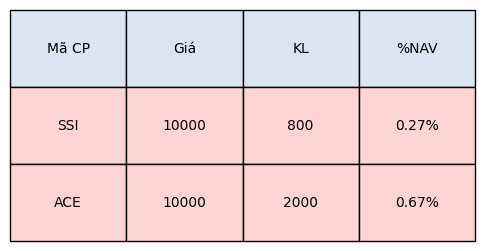

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import matplotlib.patches as patches
import io


# Dữ liệu dạng dict
data = [
    {
        "id": 9,
        "stockCode": "SSI",
        "volume": 800,
        "price": 10000,
        "createdAt": "2025-07-06T15:06:54.782Z",
        "createdUser": 3,
        "updatedAt": "2025-07-07T17:53:22.866Z",
        "updatedUser": 3,
        "percent": "0.27%"
    },
    {
        "id": 10,
        "stockCode": "ACE",
        "volume": 2000,
        "price": 10000,
        "createdAt": "2025-07-07T17:55:07.767Z",
        "createdUser": 3,
        "updatedAt": "2025-07-07T17:55:07.898Z",
        "updatedUser": 3,
        "percent": '0.67%'
    }
]

# Chọn các cột cần hiển thị
headers = ['Mã CP', 'Giá', 'KL', '%NAV']
rows = [[d['stockCode'], d['price'], d['volume'], d['percent']] for d in data]

# Tạo hình
fig, ax = plt.subplots(figsize=(6, 2 + 0.5 * len(rows)))
ax.set_axis_off()

# Tạo table
table = Table(ax, bbox=[0, 0, 1, 1])

n_rows = len(rows)
n_cols = len(headers)
width, height = 1.0 / n_cols, 1.0 / (n_rows + 1)

# Header
for i, header in enumerate(headers):
    table.add_cell(0, i, width, height, text=header, loc='center', facecolor='#dbe5f1')

# Rows
for row_idx, row in enumerate(rows, start=1):
    for col_idx, cell in enumerate(row):
        table.add_cell(row_idx, col_idx, width, height, text=str(cell), loc='center', facecolor='#fdd3d3')

# Viền
for i in range(n_rows + 1):
    for j in range(n_cols):
        cell = table[(i, j)]
        cell.set_linewidth(1)
        cell.set_edgecolor("black")

ax.add_table(table)


# ===== 📦 Export thành buffer =====
buf = io.BytesIO()
plt.savefig(buf, format='png', dpi=500, bbox_inches='tight')
buf.seek(0)  # rất quan trọng!

file_size_bytes = len(buf.getvalue())
file_size_kb = file_size_bytes / 1024
print(f"Kích thước file ảnh: {file_size_bytes} bytes (~{file_size_kb:.2f} KB)")

plt.show()
